In [1]:
%matplotlib inline
from matplotlib import rcParams
import matplotlib.pyplot as plt

# Introduction to Ensemble Methods

Ensemble methods are techniques for obtaining better predictive performances by using multiple models.

The following dataset comes from a bank which would like to know when a new client arrives if this client will subscribe to a long term deposit.

The bank will be considered as your client in the following parts.

---

**Feel free to create sklearn Pipelines for simplifying the following experiments** 

## Introducing and exploring the dataset

The dataset is located in `../data/bank-full.csv`. It has 17 columns, the target column or $ŷ$ is the column named `y`.

Columns summary  : 

| column name | simple description |
|-------------|------------------------|
| age | age |
| job | type of job |
| marital | marital status |
| education | education level |
| default | has credit in default? |
| housing | has housing loan? |
| contact | contact communication |
| month | last contact month of year |
| day | last contact day of the month |
| duration |  last contact duration in seconds |
| campaign |  number of contacts performed during campaign for this client |
| pday | number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted) |
| previous | number of contacts performed before this campaign and for this client |
| poutcome | outcome of the previous marketing campaign |
| **output :** |  |
| y | has  the client subscribed a term deposit? |

Let's explore the dataset a bit using pandas.

While exploring the dataset it is recommended to create a list of categorical features

In [2]:
import pandas as pd

Create a dataframe with the dataset `../data/bank-full.csv`

In [3]:
# code here
df = pd.read_csv('../data/bank-full.csv',sep=';',engine='python')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Describe the dataset informations

In [4]:
# code here
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Use histogramms to display the features' distribution

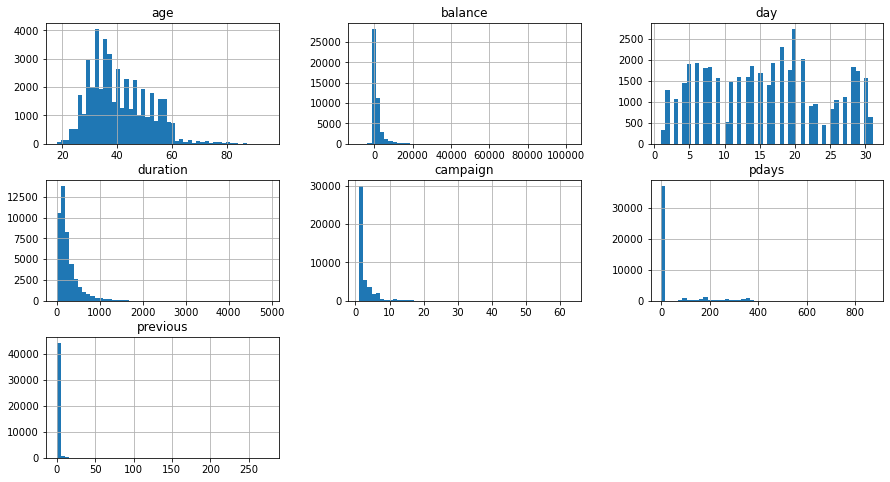

In [5]:
# code here
df.hist(bins=50, figsize=(15,8));

Use heatmap to display the numerical features' correlation

<AxesSubplot:>

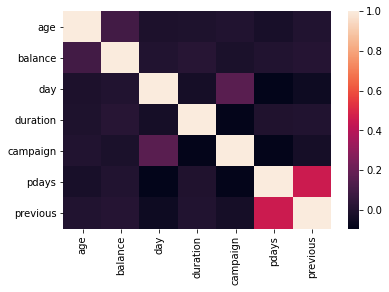

In [6]:
# code here
import seaborn as sns
num_corr=df.corr()

sns.heatmap(num_corr, xticklabels=num_corr.columns, yticklabels=num_corr.columns)
# nothing really correlated

In order to continue the preprocessing, the features `day` and `month` should be merged into one column named `dayoftheyear`.

You can use pandas datetime tools or python datetime librairies for doing this preprocessing.
(the default year used will be 1984)

In [7]:
# on transforme les mois str en mois int

d = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
df.month = df.month.map(d)
df.month

0         5
1         5
2         5
3         5
4         5
         ..
45206    11
45207    11
45208    11
45209    11
45210    11
Name: month, Length: 45211, dtype: int64

In [8]:
#code here

df['dayoftheyear']=pd.to_datetime(df['day'].astype(str)+' '+df['month'].astype(str)+' 1984',errors='coerce').dt.dayofyear
df['dayoftheyear'].head()

0    126
1    126
2    126
3    126
4    126
Name: dayoftheyear, dtype: int64

In [9]:
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,dayoftheyear
3610,42,blue-collar,married,primary,no,2519,yes,no,unknown,15,5,262,4,-1,0,unknown,no,136
17906,45,admin.,married,secondary,no,3307,no,no,cellular,30,7,129,2,-1,0,unknown,no,212
6511,34,blue-collar,married,primary,no,244,yes,no,unknown,27,5,15,13,-1,0,unknown,no,148
11900,56,blue-collar,married,primary,no,3643,no,no,unknown,20,6,11,3,-1,0,unknown,no,172
2729,33,services,married,secondary,no,184,yes,no,unknown,13,5,109,4,-1,0,unknown,no,134
16365,60,retired,divorced,primary,no,61,yes,no,telephone,23,7,197,2,-1,0,unknown,no,205
7427,54,blue-collar,divorced,secondary,no,0,yes,yes,unknown,29,5,273,2,-1,0,unknown,no,150
787,46,management,married,tertiary,no,0,no,no,unknown,7,5,70,2,-1,0,unknown,no,187
36664,43,blue-collar,married,secondary,no,1324,yes,no,telephone,12,5,179,5,-1,0,unknown,no,340
4173,24,blue-collar,single,secondary,no,0,yes,no,unknown,19,5,202,1,-1,0,unknown,no,140


Now sort the features into categorical and numerical features

In [10]:
categorical_features = ['job','marital','education','default','housing','loan','contact','poutcome'] # to be completed
numerical_features = ['age','balance','duration','pdays','previous','campaign','dayoftheyear'] # to be completed

After a first exploration, categorical/ordinal features (10 columns) need to be encoded in order to become a valid input for the modeling phase.

The different encoders can be found [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).

(You can also use the function `get_dummies` of pandas for categorical features)

In [11]:
# import and create the appropriate encoders

# pas besoin de splitter les données en train et test car on va pas faire de preprocessing sur les données
# numériques (ce qui aurait nécessité de récup la moyenne etc.)

df_prepared=pd.get_dummies(df,columns=categorical_features)
df_prepared

,age,balance,day,month,duration,campaign,pdays,previous,y,dayoftheyear,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,5,261,1,-1,0,no,126,...,1,1,0,0,0,1,0,0,0,1
1,44,29,5,5,151,1,-1,0,no,126,...,1,1,0,0,0,1,0,0,0,1
2,33,2,5,5,76,1,-1,0,no,126,...,1,0,1,0,0,1,0,0,0,1
3,47,1506,5,5,92,1,-1,0,no,126,...,1,1,0,0,0,1,0,0,0,1
4,33,1,5,5,198,1,-1,0,no,126,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,11,977,3,-1,0,yes,322,...,0,1,0,1,0,0,0,0,0,1
45207,71,1729,17,11,456,2,-1,0,yes,322,...,0,1,0,1,0,0,0,0,0,1
45208,72,5715,17,11,1127,5,184,3,yes,322,...,0,1,0,1,0,0,0,0,1,0
45209,57,668,17,11,508,4,-1,0,no,322,...,0,1,0,0,1,0,0,0,0,1


Now, the dataset needs to be split into two sets :
1. one corresponding to $ŷ$ 
2. the other corresponding to the $X$ matrix.

- Prepare the learning dataset

In [12]:
# Create the X and y DataFrames resample the dataframes if necessary
y = df_prepared.pop('y')
X = df_prepared

At the end of this part, two dataframes are created :

- `X` containing the features (or the matrix $X$)
- `y` containing the label (or $ŷ$)

Display the shape of X and y

In [13]:
# code here
y.shape

(45211,)

In [14]:
X.shape

(45211, 41)

Well done! The data is now ready to be splitted into sets and used to train models!

## Modelling phase

The client needs two features :

1. A model, which can be updated without performance loss.
2. A model, that performs well.

In order to highlight decision trees advantages and drawbacks, remove the `duration` column from the `X` dataset.

In [15]:
# remove duration column
X.drop(labels='duration',axis=1,inplace=True)
X.shape

(45211, 40)

Before beginning the modelling phase let's split the dataset into one training set and one testing set.

In [16]:
# train_test split
# X_train, X_test, y_train, y_test = None

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

### Simple Decision Tree

We will experiment both feature by doing the two following steps.

* Training the Decision Tree model with various splits of the dataset (change the `seed` parameter of the `train_test_split` function for obtaining the second dataset)
* The decision tree `max_depth` will be fixed at 3 

if you need more info you can take a look at the [sklearn decision tree doc](https://scikit-learn.org/stable/modules/tree.html).

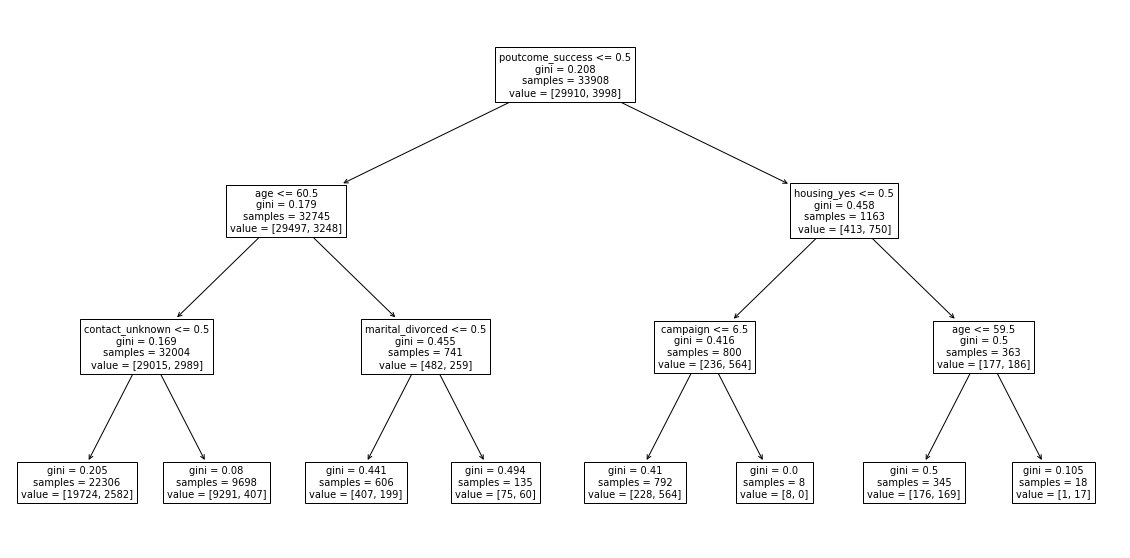

In [17]:
# Decision tree model creation and tree visualization
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree

clf = DecisionTreeClassifier(random_state=10,max_depth=3)
clf.fit(X_train,y_train)

plt.figure(figsize=(20,10))
plot_tree(clf,feature_names=X_train.columns);

Now, a first model has been created, change the random seed for the train/test split, and create another tree.

This tree should be created with the same hyperparameters than above. 

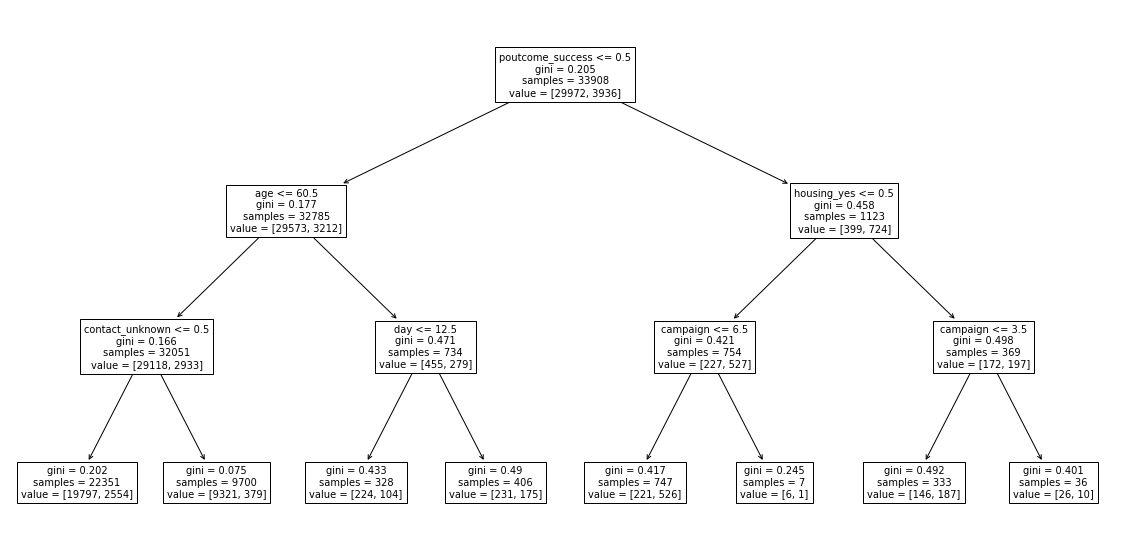

In [18]:
# create a new train and test dataset with a different seed

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=42)
clf = DecisionTreeClassifier(random_state=10,max_depth=3)
clf.fit(X_train2,y_train2)
plt.figure(figsize=(20,10))
plot_tree(clf,feature_names=X_train2.columns);

What can you tell about the two trees?

In [19]:
# the 2 trees are not the same, the criteria slightly change while just changing the split of train_test_split.
# modèle peu fiable ?

Normally, before creating a model, one or more evaluation metrics should be chosen depending of the client problem.

* Choose two different metrics from this article : [model evaluation](https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234).

* Prepare a scoring list for these metrics.

* Use the cross-validation method to measure these metrics (if you need see : [cross validation sklearn](https://scikit-learn.org/stable/modules/cross_validation.html)). 

*Hint:*  the `cross_validate` method allows you to pass a metric list as parameter (see [doc here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) ).

In [20]:
# Cross validation on Decision trees
from sklearn.model_selection import cross_validate

score_list = ['roc_auc','f1','precision','recall'] # les metrics qu'on veut tester sur notre modèle

y_train = y_train.map({'yes': 1, 'no': 0}).astype(int) # on convertit les yes/no de y en nbre
cv_results=cross_validate(clf,X_train,y_train,cv=5,scoring=score_list)

In [21]:
cv_results

{'fit_time': array([0.10685134, 0.08306336, 0.1199894 , 0.12595296, 0.12293839]),
 'score_time': array([0.03278255, 0.02405739, 0.03463387, 0.03396559, 0.03701711]),
 'test_roc_auc': array([0.68207132, 0.68011608, 0.68464456, 0.6820204 , 0.66216223]),
 'test_f1': array([0.26461538, 0.22851153, 0.2406639 , 0.26068822, 0.2231405 ]),
 'test_precision': array([0.73714286, 0.70779221, 0.70731707, 0.78125   , 0.63905325]),
 'test_recall': array([0.16125   , 0.13625   , 0.145     , 0.15644556, 0.13516896])}

Now process the output of your cross-validation in order to know the diversity in performances and the average performance

Plot your metrics performance

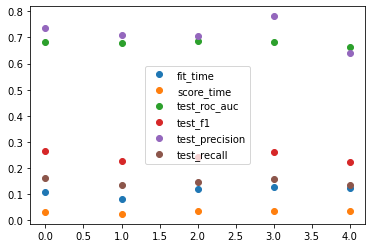

In [22]:
# performance plot
for key in cv_results:
    plt.plot(cv_results[key],label=key,linestyle='',marker='o')
    plt.legend()

What do you notice?

In [23]:
# nos clients cherchent à récupérer le max de clients potentiellement positifs. Ils voudraient appeler les
# positifs en en loupant le moins possible (diminuer le nbre de faux négatifs = grande recall) et sont moins
# intéressés par appeler les non-intéressés (diminuer le nbre de faux positifs = grande précision).

# ici on voit un f1 faible -> grande précision OK mais recall très mauvais. Notre modèle n'est pas très bon.

### Introducing Ensemble Learning with Bagging models.

Let's train multiple classifiers in parallel in a bootstraping approach! 

Bagging stands for ***Boostrap AGGregatING***.

(if you need a reminder of statistical bootstraping take a short look on [Wikipedia](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)) )

The following [post](https://blog.octo.com/les-methodes-ensemblistes-pour-algorithmes-de-machine-learning/) will give you an overview of these methods and their advantages and drawbacks

**The train test split using a seed equals to 42 will be used in the following part**

In [24]:
# train_test split (you can copy paste the previously declared cell)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
y_train = y_train.map({'yes': 1, 'no': 0}).astype(int) # on convertit les yes/no de y en nbre
# df_bank['y'].replace(['yes', 'no'], [1, 0], inplace = True) -> autre méthode à faire avant les split

#### Using Random Forest

The concept of random forest is explained in this [post](https://medium.com/analytics-vidhya/understanding-the-random-forest-algorithm-79b87bdde79a).

Now the best parameters of the previous classifier will be used in a using a bagging classifier
[sklearn : Random Forest Doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier)

We will use grid search on the `n_estimators` parameter. (select 4 values in the range \[5-100\] ) 

In [67]:
# gridsearch for the Random Forest classifier

# Le random forest a déjà du bagging inclus de base car c'est une forêt composée de plusieurs arbres et on fait la moy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

random_forest=RandomForestClassifier()
parameters = {'n_estimators':[5,30,70,100]}
clf_rf = GridSearchCV(random_forest, parameters,scoring='recall')

In [68]:
clf_rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [5, 30, 70, 100]}, scoring='recall')

How much estimators should we use for obtaining an optimal result? (in terms of time and performance)

In [69]:
print(clf_rf.best_params_)

{'n_estimators': 5}


Now, cross validate the Random forest classifier with the selected metric used with the Decision Trees.

In [70]:
# cross validation
cv_results_random_forest=cross_validate(clf_rf.best_estimator_,X_train,y_train,cv=5,scoring=score_list)

Display cross validation results

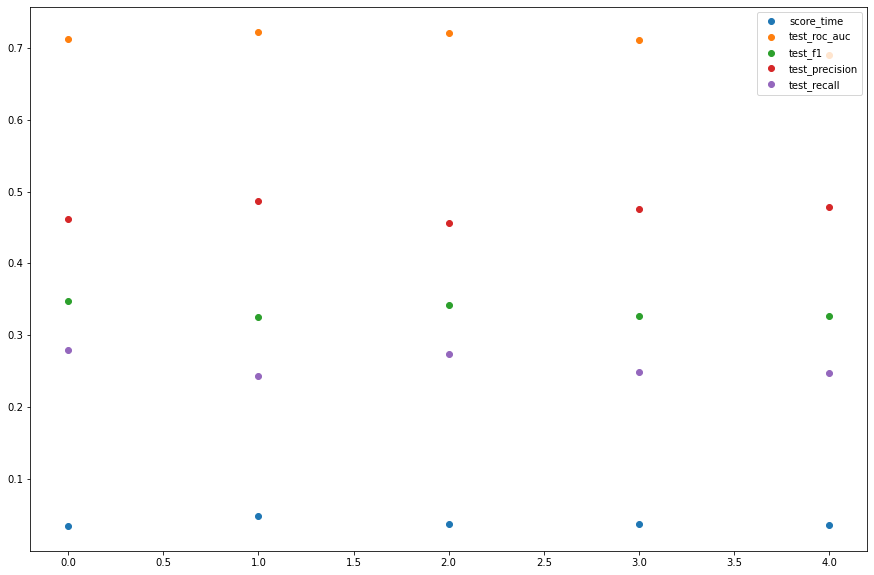

In [71]:
# evaluation curves
for key in cv_results_random_forest:
    if key!='fit_time':
        plt.plot(cv_results_random_forest[key],label=key,linestyle='',marker='o')
        plt.legend()

In [30]:
# recall a légèrement augmenté, précision a diminué.

#### Other Random Forest effect

The random forest model can attribute an importance value to features, [explanations here](https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e)

Let's train another random forest and display an histogramm with it :

In [31]:
# training and display features' importance.
# tell them to use the RandomForest Object
rf = RandomForestClassifier(n_estimators = 5,
                           random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=42)

In [32]:
rf.feature_importances_

array([0.1339712 , 0.15614983, 0.08776384, 0.07068881, 0.05805314,
       0.05001873, 0.02384256, 0.11697969, 0.01239645, 0.01215168,
       0.00438437, 0.00432448, 0.01306966, 0.00559192, 0.00571818,
       0.00892031, 0.00504939, 0.01397884, 0.00541938, 0.00162911,
       0.00851313, 0.01065431, 0.01099432, 0.00967903, 0.01289852,
       0.0109292 , 0.00542504, 0.00155582, 0.00197106, 0.01331699,
       0.00944075, 0.00674767, 0.010278  , 0.00924011, 0.00455452,
       0.01007672, 0.00433736, 0.00401917, 0.06399035, 0.00127637])

In [33]:
labels=list(X.columns)
labels

['age',
 'balance',
 'day',
 'month',
 'campaign',
 'pdays',
 'previous',
 'dayoftheyear',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'default_no',
 'default_yes',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown']

In [34]:
zip_rf=pd.DataFrame(zip(labels,rf.feature_importances_))
zip_rf=zip_rf.sort_values(by=1,ascending=True)
zip_rf

,0,1
39,poutcome_unknown,0.001276
27,default_no,0.001556
19,job_unknown,0.001629
28,default_yes,0.001971
37,poutcome_other,0.004019
11,job_housemaid,0.004324
36,poutcome_failure,0.004337
10,job_entrepreneur,0.004384
34,contact_telephone,0.004555
16,job_student,0.005049


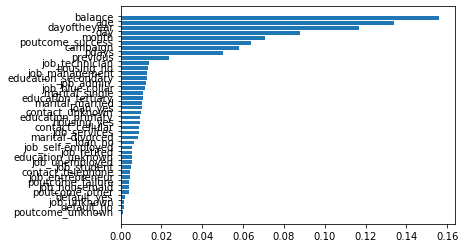

In [35]:
import numpy as np
fig, ax = plt.subplots() 
plt.rcParams["figure.figsize"] = (15,10)
width = 0.75 
ind = np.arange(len(zip_rf[1]))  # the x locations for the groups
ax.barh(ind, zip_rf[1], width)
ax.set_yticks(ind+width/2)
ax.set_yticklabels(zip_rf[0])
plt.show()

What is the most important feature?

In [ ]:
# Top 3 des features importantes : balance, age, dayoftheyear

We removed the duration feature in our dataset

Read this feature description on the dataset description ([here on data.world](https://data.world/uci/bank-marketing) or [here on kaggle](https://www.kaggle.com/janiobachmann/bank-marketing-dataset)).

How would the previously trained models perform with this feature?

In [36]:
# si on avait gardé duration: ce serait la feature la plus importante car grandement liée à y

### Continue Ensemble Learning with boosting techniques

Bagging permits to average the results of separated models, whereas the boosting technique trains a classifier and optimizes it in function of its error.

Some information about boosting techniques are on the [sklearn documentation](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting) but a commonly used library for these techniques is [XGBoost](https://xgboost.readthedocs.io/en/latest/index.html) there are some compatibilities with the sklearn methods (gridsearch, cross validation,...)

- install the `xgboost` package

*Read the articles in resources for a complete explanation.*

In this part a classifier will be trained and evaluated.

In [44]:
# use the same split and seed than you used before
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
y_train = y_train.map({'yes': 1, 'no': 0}).astype(int)

*Hint:* An example for integrating `XGBoost` with  the `sklearn` tools is available [here](https://medium.com/@juniormiranda_23768/ensemble-methods-tuning-a-xgboost-model-with-scikit-learn-54ff669f988a)

In [53]:
import xgboost as xgb

Let's build a new model than before with a grid search on the parameter `n_estimators`.

In [54]:
# model building and evaluation
from xgboost import XGBClassifier

boost = XGBClassifier()
parameters = {'n_estimators':[5,10,30,50,70,80,100]}
boosting = GridSearchCV(boost,parameters,scoring='recall') # on teste que pour un scoring, le recall

In [55]:
boosting.fit(X_train, y_train)

C:\Users\Rubal\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Rubal\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[14:34:43] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:34:43] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:34:43] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:34:44] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[14:35:20] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:23] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:25] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [56]:
boosting.best_params_

{'n_estimators': 100}

In [59]:
boosting.best_estimator_ # c'est un objet de type classifier avec tous les meilleurs paramètres

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
pd.DataFrame(boosting.cv_results_) # les résultats de la cross validation avec recall 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.199415,0.009481,0.022235,0.002473,5,{'n_estimators': 5},0.171537,0.180432,0.194162,0.172808,0.158831,0.175554,0.011605,7
1,0.359507,0.094925,0.021995,0.002288,10,{'n_estimators': 10},0.167726,0.182973,0.200508,0.168996,0.166455,0.177332,0.013031,6
2,0.760615,0.027004,0.019879,0.004176,30,{'n_estimators': 30},0.237611,0.249047,0.244924,0.218551,0.226175,0.235262,0.011408,5
3,1.202991,0.008523,0.024343,0.002560,50,{'n_estimators': 50},0.241423,0.265565,0.255076,0.238882,0.233799,0.246949,0.011672,4
4,1.544496,0.018217,0.023217,0.003310,70,{'n_estimators': 70},0.252859,0.266836,0.260152,0.246506,0.245235,0.254318,0.008202,3
5,1.926124,0.128387,0.022173,0.003699,80,{'n_estimators': 80},0.256671,0.274460,0.257614,0.242694,0.246506,0.255589,0.011047,2
6,2.269196,0.027249,0.022314,0.002341,100,{'n_estimators': 100},0.263024,0.275731,0.261421,0.250318,0.251588,0.260416,0.009190,1


Now cross validate the selected model and display the performance curves

In [62]:
# cross validation
cv_results_boost=cross_validate(boosting.best_estimator_,X_train,y_train,cv=5,scoring=score_list)

# on fait un cross_validate pour estimer pour plusieurs scoring

C:\Users\Rubal\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:52:18] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rubal\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\Rubal\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\Rubal\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:52:20] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rubal\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\Rubal\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:52:22] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rubal\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\Rubal\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:52:24] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rubal\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\Rubal\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:52:26] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Rubal\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


<AxesSubplot:>

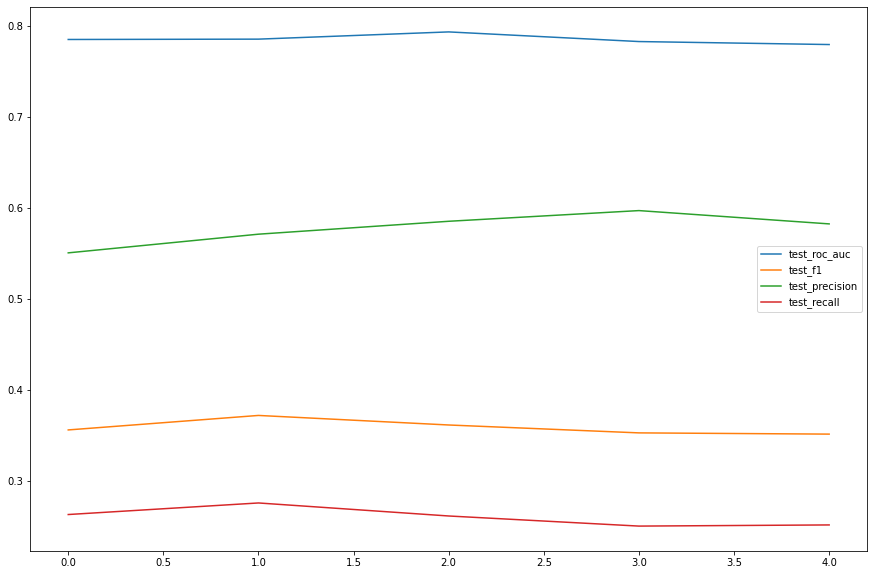

In [65]:
pd.DataFrame(cv_results_boost).iloc[:,2:].plot()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

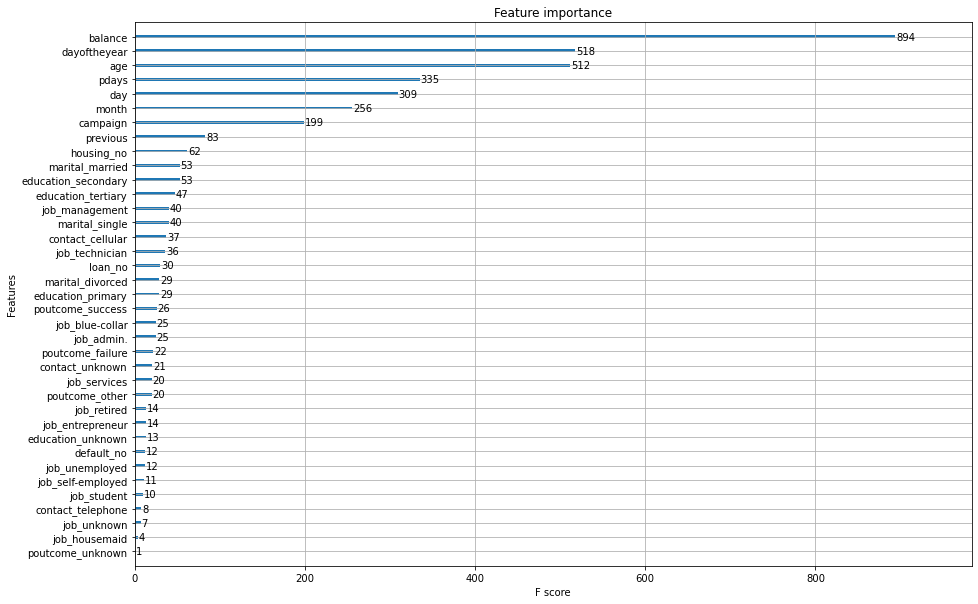

In [66]:
# performance curves
xgb.plot_importance(boosting.best_estimator_)

## Let's Conclude

Before writing a memo, use your classifiers on the test set and display evaluation metrics 

In [81]:
# Decision Tree on test set
# y_test = y_test.map({'yes': 1, 'no': 0}).astype(int)
from sklearn.metrics import recall_score
y_pred_clf=clf.predict(X_test)
print(recall_score(y_test,y_pred_clf))

0.2557280118255728


In [86]:
# Random forest on test set
clf_rf.best_estimator_.fit(X_train,y_train)
y_pred_clf_rf=clf_rf.best_estimator_.predict(X_test)
print(recall_score(y_test,y_pred_clf_rf))

0.2675535846267554


In [87]:
# XGBoost on test set
boosting.best_estimator_.fit(X_train,y_train)
y_pred_boosting=boosting.best_estimator_.predict(X_test)
print(recall_score(y_test,y_pred_boosting))

C:\Users\Rubal\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:32:23] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.24168514412416853


C:\Users\Rubal\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


What do you notice?

In [ ]:
# bagging mieux que boosting et arbre de décision simple

*answer here*

- Write your memo about bagging and boosting method in a cell below.
- Which model would you choose for the bank, and why?

you can add your models result visualization in this cell if it helps you explaining your conclusions.

In [ ]:
# Multiclassifier -> plusieurs modèles entrainés sur plusieurs échantillons de données mais dans un seul algorithme.
# permettent en principe de réduire les risques d'erreur et produisent des estimations plus 'stables'.
# 
# Bagging : échantillonage aléatoire. Tous les modèles prédisent chacun une estimation et on aggrège les réponses.
# ex: le modèle random_forest fait des prédictions sur chaque arbre puis fait la moyenne des réponses.
# 
# Boosting : échantillonage pondéré en poids, les éléments mal-classés ont un poids plus important pour entrainer les 
# modèles sur les cas difficiles. Les éléments ayant un poids plus élevés sont plus présents dans les modèles suivants.
# Chaque modèle prédit un à un et s'il afait de bonnes prédictions, son poids augmente. Certains modèles peuvent même 
# être retirés s'il sont trop mauvais. Attention à l'over-fitting

## To go further

### Build a customized bagging classifier (Optional) 

- Use a different classification model you have seen until now and build a new classifier based on the [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier) to create and train an new model.
- Use differents classification models and use the [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier) to create and train an new model.

In [0]:
# Write your code here

## Resample the data

Before going through the modelling phase, let's see the label distribution :

Use the `value_counts` function and the appropriate visualization for displaying the label distribution

In [0]:
# code here

What do you notice?

*answer here*

You can find some techniques for rebalancing the data [here](https://blog.octo.com/donnees-desequilibrees-que-faire/), [here](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html).

Rebalance the data.

In [0]:
# code here